In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt


In [2]:
torch.backends.mps.is_available()

True

In [3]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device

device(type='mps')

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [5]:
trainset = torchvision.datasets.CIFAR10(root = 'Users/seunghyunpark/ai/code',
                                        train=True,download=True,
                                        transform = transform)

testset = torchvision.datasets.CIFAR10(root = 'Users/seunghyunpark/ai/code',
                                        train=False,download=True,
                                        transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
import multiprocessing

num_workers = multiprocessing.cpu_count() // 2  # CPU 코어 수의 절반으로 설정
num_workers

6

In [24]:


train_loader = DataLoader(trainset,
                          batch_size = 4,
                          shuffle = True,
                          num_workers=6
                          )

test_loader = DataLoader(testset,
                          batch_size = 4,
                          shuffle = False,
                          num_workers=6
                          )

In [13]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

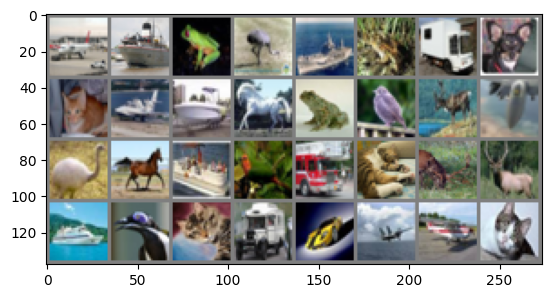

plane	 ship	 frog	 bird	


In [14]:


def imshow(img):
    img = img / 2+ 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join('{}\t'.format(classes[labels[j]]) for j in range(4)))

In [15]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5* 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = CNN().to(device)


In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum =0.9)

In [25]:
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        if i %2000 == 1999:
            print("Epoch: {}, Batch: {}, Loss: {}".format(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0
            

Epoch: 1, Batch: 2000, Loss: 1.16489352687262
Epoch: 1, Batch: 4000, Loss: 1.172387806251645
Epoch: 1, Batch: 6000, Loss: 1.1278563604485243
Epoch: 1, Batch: 8000, Loss: 1.1542224907130003
Epoch: 1, Batch: 10000, Loss: 1.1546051339134573
Epoch: 1, Batch: 12000, Loss: 1.117815555119887
Epoch: 2, Batch: 2000, Loss: 1.0645885976701974
Epoch: 2, Batch: 4000, Loss: 1.0539868409894406
Epoch: 2, Batch: 6000, Loss: 1.0631133025147428
Epoch: 2, Batch: 8000, Loss: 1.0359224634286948
Epoch: 2, Batch: 10000, Loss: 1.0968012872794644
Epoch: 2, Batch: 12000, Loss: 1.0508050709031522
Epoch: 3, Batch: 2000, Loss: 0.9770932542588562
Epoch: 3, Batch: 4000, Loss: 0.9904227599222213
Epoch: 3, Batch: 6000, Loss: 1.0232469339538366
Epoch: 3, Batch: 8000, Loss: 1.0052541072089225
Epoch: 3, Batch: 10000, Loss: 1.0082729237582535
Epoch: 3, Batch: 12000, Loss: 0.9968778974227607
Epoch: 4, Batch: 2000, Loss: 0.9173842641375959
Epoch: 4, Batch: 4000, Loss: 0.936456809161231
Epoch: 4, Batch: 6000, Loss: 0.94076751

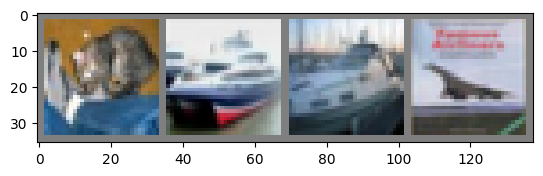

cat	 ship	 ship	 plane	


In [26]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('{}\t'.format(classes[labels[j]]) for j in range(4)))

In [27]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images.to(device))

        _, predicted = torch.max(outputs.data , 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(100*correct/total)

57.67
